# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [27]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [28]:
pd.read_csv(url, sep = '\t')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

In [29]:
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [30]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [84]:
qnt = chipo.drop(columns=['order_id' , 'item_price'])
qnt = qnt.groupby('item_name').sum()
qnt = qnt.sort_values(by= "quantity", ascending = False)
qnt = qnt[:5]

Text(0, 0.5, 'Quantidade')

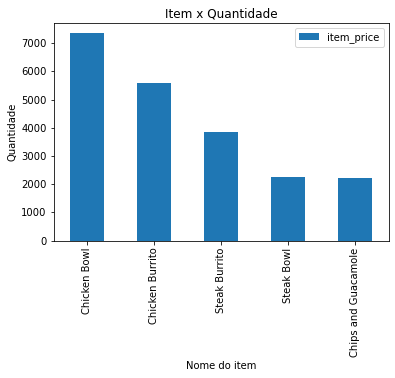

In [99]:
#plot.bar() e plot.barh() criam plotagens de barra vertical e horizontal, respectivamente.
qnt.plot.bar()
plt.title('Item x Quantidade')
plt.xlabel('Nome do item')
plt.ylabel('Quantidade')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [149]:
chipo['item_price'] = chipo['item_price'].apply(lambda x:str(x).replace("$" , " ")).astype('float64')
order = chipo.groupby('order_id').sum()

Text(0, 0.5, 'Quantidade')

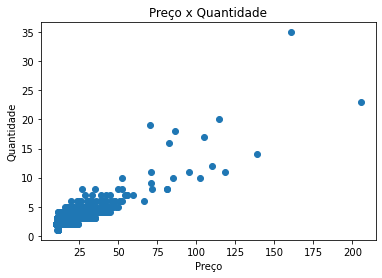

In [150]:
plt.scatter(x = order['item_price'], y = order['quantity'])
plt.title('Preço x Quantidade')
plt.xlabel('Preço')
plt.ylabel('Quantidade')

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [151]:
#Nesse step eu queria testar o .barh().
#Então fiz um gráfico mostrando os produtos com a choice description mais "lucrativas" (não estou conseguindo pensar numa palavra melhor)
#Talvez não faça muito sentido, mas foi para treinar esse tipo de gráfico.
#Decidi deixar, também, a comparação com a quantidade

choice = chipo.groupby('choice_description').sum()
choice = choice.sort_values(by = 'item_price' , ascending = False)
choice = choice.drop(columns = 'order_id')
choice = choice[:5]

Text(0, 0.5, 'Top 5: Choice description mais lucrativas')

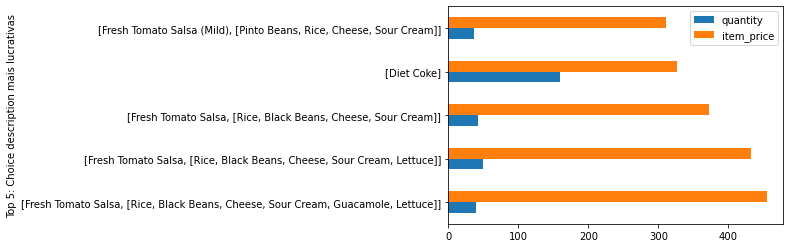

In [152]:
choice.plot.barh()
plt.ylabel('Top 5: Choice description mais lucrativas')